# Movie recommendation

In [24]:
# import libraries

import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Cosine distance:

the smaller the angle between any two points, the higher the cosine value implying more similarity

In [25]:
# load raw data

movies = pd.read_csv('movies.csv')

In [26]:
movies.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [28]:
# feature selection

selected_features = ['genres', 'keywords', 'tagline', 'cast', 'director']


In [29]:
movies.isnull()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4799,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4800,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4801,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
movies.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [31]:
for feature in selected_features:
  movies[feature].fillna('', inplace=True)


In [32]:
movies.isnull().sum()

index                      0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
director                   0
dtype: int64

In [33]:
# combine the selected features into one string

combined_features = movies[selected_features].apply(" ".join, axis=1)
combined_features

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object

In [34]:
type(combined_features)

pandas.core.series.Series

### A detour on vectorisation...

#### Convert textual data into vectors

Make use of TF-IDF (Term Frequency-Inverse Document Frequency) in order to find the similarity between the movies.

TF-IDF gives weights to the words; the higher the frequency of the word, the lesser its relevance.

In [35]:
# words with their ids

text = [
  "The cycle is ridden on the track.",
  "The bus is driven on the road.",
  "He is driving the bus."
]

# create the transform
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(text)

print(X)

# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

  (0, 10)	0.4334516694863821
  (0, 6)	0.3296511670576223
  (0, 7)	0.4334516694863821
  (0, 5)	0.25600353853646324
  (0, 1)	0.4334516694863821
  (0, 9)	0.5120070770729265
  (1, 8)	0.45171081733259827
  (1, 2)	0.45171081733259827
  (1, 0)	0.34353771963248086
  (1, 6)	0.34353771963248086
  (1, 5)	0.2667876853937835
  (1, 9)	0.533575370787567
  (2, 3)	0.55249004708441
  (2, 4)	0.55249004708441
  (2, 0)	0.42018292148905534
  (2, 5)	0.3263095219528963
  (2, 9)	0.3263095219528963
{'the': 9, 'cycle': 1, 'is': 5, 'ridden': 7, 'on': 6, 'track': 10, 'bus': 0, 'driven': 2, 'road': 8, 'he': 4, 'driving': 3}
[1.28768207 1.69314718 1.69314718 1.69314718 1.69314718 1.
 1.28768207 1.69314718 1.69314718 1.         1.69314718]


In [36]:
# print out the unique words for our vectorizer

vectorizer.get_feature_names_out()


array(['bus', 'cycle', 'driven', 'driving', 'he', 'is', 'on', 'ridden',
       'road', 'the', 'track'], dtype=object)

the vectorizer performs stemming to reduce the unimportant words and reduce the data we have to work with

Lemmatization is another technique used in NLP.

Stemming: Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling.

Lemmatization: Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. For instance, stemming the word 'Caring' would return 'Car'.

In [37]:
# print TF-IDF values

print(vectorizer.idf_)

[1.28768207 1.69314718 1.69314718 1.69314718 1.69314718 1.
 1.28768207 1.69314718 1.69314718 1.         1.69314718]


we see that the less important word (the, is) have lesser weight in the TF-IFD output

In [38]:
type(vectorizer.idf_)

numpy.ndarray

In [39]:
vectorizer.idf_.max()

1.6931471805599454

Cosine similarity

In [40]:
sim = cosine_similarity(X)


In [41]:
sim.shape

(3, 3)

In [42]:
sim

array([[1.        , 0.45474057, 0.25060918],
       [0.45474057, 1.        , 0.40551477],
       [0.25060918, 0.40551477, 1.        ]])

#### Difflib library

This helps us get values (strings) that are close, ie: have small diff, instead of normal string equality comparison which will reault in many mismatches

In [43]:
a = 'Maxwell Twum'
b= ' Maxill Twim'

difflib.SequenceMatcher(None, a, b).ratio()

0.75

In [44]:
a = 'Maxwell Twum'
b= ' Maxwell Twim'

difflib.SequenceMatcher(None, a, b).ratio()

0.88

From the above examples, we see the second has a better score since it is more similar

### Back to the movies dataset

In [45]:
# create vectors

vectorizer = TfidfVectorizer()

feature_vectors = vectorizer.fit_transform(combined_features)

In [46]:
type(feature_vectors)

scipy.sparse._csr.csr_matrix

In [47]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.11280357148547558
  (0, 13024)	0.19423620601088706
  (0, 10229)	0.160586854000953
  (0, 8756)	0.22709015857011813
  (0, 14608)	0.1515067239876391
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.2059609041508414
  (0, 13319)	0.21774705394124838
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898791
  (0, 13349)	0.15021264094167083
  (0, 11503)	0.2721131005698365
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.12821263228505786
  (0, 15261)	0.07095833561276564
  (0, 4945)	0.24025852494110755
  (0, 14271)	0.2139217921991287
  (0, 3225)	0.24960162956997733
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.2139217921991287
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672)	0

In [48]:
vectorizer.get_feature_names_out()

array(['000', '007', '05', ..., 'zwigoff', 'zylka', '最后的舞者'], dtype=object)

In [49]:
len(vectorizer.get_feature_names_out())

17318

In [50]:
# see the unique words in the vectorizer with their ids

vectorizer.vocabulary_

{'action': 201,
 'adventure': 274,
 'fantasy': 5274,
 'science': 13599,
 'fiction': 5437,
 'culture': 3678,
 'clash': 3065,
 'future': 5836,
 'space': 14378,
 'war': 16587,
 'colony': 3225,
 'society': 14271,
 'enter': 4945,
 'the': 15261,
 'world': 16998,
 'of': 11192,
 'pandora': 11503,
 'sam': 13349,
 'worthington': 17007,
 'zoe': 17290,
 'saldana': 13319,
 'sigourney': 14064,
 'weaver': 16668,
 'stephen': 14608,
 'lang': 8756,
 'michelle': 10229,
 'rodriguez': 13024,
 'james': 7755,
 'cameron': 2432,
 'ocean': 11169,
 'drug': 4550,
 'abuse': 164,
 'exotic': 5135,
 'island': 7658,
 'east': 4695,
 'india': 7490,
 'trading': 15544,
 'company': 3273,
 'love': 9307,
 'one': 11275,
 'life': 9074,
 'at': 972,
 'end': 4911,
 'begins': 1463,
 'johnny': 7958,
 'depp': 4098,
 'orlando': 11330,
 'bloom': 1816,
 'keira': 8277,
 'knightley': 8491,
 'stellan': 14596,
 'skarsg': 14145,
 'u00e5rd': 15844,
 'chow': 2968,
 'yun': 17183,
 'fat': 5313,
 'gore': 6284,
 'verbinski': 16338,
 'crime': 3595

In [51]:
type(vectorizer.vocabulary_)

dict

In [52]:
similar = cosine_similarity(feature_vectors)

In [53]:
similar

array([[1.        , 0.07219487, 0.037733  , ..., 0.        , 0.        ,
        0.        ],
       [0.07219487, 1.        , 0.03281499, ..., 0.03575545, 0.        ,
        0.        ],
       [0.037733  , 0.03281499, 1.        , ..., 0.        , 0.05389661,
        0.        ],
       ...,
       [0.        , 0.03575545, 0.        , ..., 1.        , 0.        ,
        0.02651502],
       [0.        , 0.        , 0.05389661, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02651502, 0.        ,
        1.        ]])

In [54]:
# convert movie titles to list

list_of_movies = movies['title'].tolist()

list_of_movies

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Oz: The Great and Powerful',
 'The Amazing Spider-Man 2',

#### Taking user input...

In [55]:
user_movie = input('Enter movie name')

#### Use the difflib library here to compare the user's input string sequence
#### Then try guessing what the user wanted to type
find_close_match = difflib.get_close_matches(user_movie,list_of_movies)

find_close_match


['Wanted', 'Pan', 'Manito']

In [56]:
close_match = find_close_match[0]

print(close_match)

Wanted


In [57]:
# Finding movie index

index_of_movie = movies[movies['title']==close_match]['index'].values[0]

print(index_of_movie)


512


In [58]:
# Getting a list of similar movies

similarity_score = list(enumerate(similar[index_of_movie]))

print(similarity_score)

[(0, 0.08499959478556415), (1, 0.03564066428670373), (2, 0.039173951879548606), (3, 0.05984489271541455), (4, 0.028899361991867566), (5, 0.06236447608634694), (6, 0.0), (7, 0.006540309472121516), (8, 0.017742076550944435), (9, 0.06118380967257445), (10, 0.0222990486798635), (11, 0.08409068107599231), (12, 0.006615996100781823), (13, 0.01827641830365327), (14, 0.0064373718296651125), (15, 0.0), (16, 0.006201603652803266), (17, 0.006328968329036544), (18, 0.006190739734312046), (19, 0.0500165782871278), (20, 0.0706140340240299), (21, 0.005437968060412161), (22, 0.04623870975365665), (23, 0.0), (24, 0.10340045051671021), (25, 0.01952315011043669), (26, 0.006750168161815616), (27, 0.011409031627683757), (28, 0.012525770350796514), (29, 0.05625531738454022), (30, 0.054605893862431955), (31, 0.006367806037206836), (32, 0.0), (33, 0.012563129106855007), (34, 0.0), (35, 0.03607712481535632), (36, 0.006148094555838915), (37, 0.014032630497422666), (38, 0.006612903280891984), (39, 0.027334246610

In [59]:
# Sorting the values based on similarity score (similarity score is the second element in the tuple)

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

sorted_similar_movies


[(512, 1.0000000000000002),
 (248, 0.18318383438145952),
 (525, 0.17866635344795775),
 (2257, 0.16399440649885574),
 (370, 0.15386002337049157),
 (632, 0.15105605562953914),
 (668, 0.1436446382906119),
 (137, 0.13815079272576586),
 (357, 0.1378534494890952),
 (364, 0.13438856340620645),
 (2470, 0.13430721402857337),
 (1657, 0.13408142163295625),
 (2218, 0.1340437653857389),
 (437, 0.1317890705501239),
 (3203, 0.1294700090828398),
 (624, 0.12623545488553042),
 (1245, 0.125787329502903),
 (152, 0.1250555865282546),
 (448, 0.12465776941530607),
 (3881, 0.12362473986112266),
 (3733, 0.12283701950271413),
 (2632, 0.12154596069247768),
 (2060, 0.1169414300784696),
 (1048, 0.11630324243673952),
 (3074, 0.11562024887848728),
 (2476, 0.11480079506925794),
 (1258, 0.11478463593772387),
 (1202, 0.11251019875228765),
 (1405, 0.11179138087072873),
 (916, 0.11016421026186585),
 (3688, 0.10954305304815626),
 (2398, 0.10911285624996236),
 (360, 0.10906693214694145),
 (1740, 0.10900480042669947),
 (113

In [60]:
# Suggested movies
print('\n---- 20 MOVIE SUGGESTIONS---- \n')
num = 1

for i in sorted_similar_movies[:20]:
  index=i[0]
  title_from_index = movies.iloc[index]['title']
  print(num, ': ', title_from_index )
  num += 1



---- 20 MOVIE SUGGESTIONS---- 

1 :  Wanted
2 :  Mr. & Mrs. Smith
3 :  Shark Tale
4 :  By the Sea
5 :  Now You See Me 2
6 :  Dreamcatcher
7 :  Elektra
8 :  Kung Fu Panda 2
9 :  Ben-Hur
10 :  The Haunted Mansion
11 :  Double Impact
12 :  An Unfinished Life
13 :  Death Sentence
14 :  Get Smart
15 :  Ultramarines: A Warhammer 40,000 Movie
16 :  Abraham Lincoln: Vampire Hunter
17 :  Colombiana
18 :  Kung Fu Panda 3
19 :  Cold Mountain
20 :  Beginners


##### For convenience, the recommendation code is in a single cell

In [61]:
list_of_movies = movies['title'].tolist()

user_movie = input('Enter movie name')

find_close_match = difflib.get_close_matches(user_movie,list_of_movies)

close_match = find_close_match[0]

#### Finding movie index

index_of_movie = movies[movies['title']==close_match]['index'].values[0]

### Getting a list of similar movies

similarity_score = list(enumerate(similar[index_of_movie]))

#### Sorting the values based on similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)


##### Suggested movies
print('\n---- 10 MOVIE SUGGESTIONS ----\n')
num = 1
sim = []
t = []


for i in sorted_similar_movies[:10]:
  index = i[0]
  title_from_index = movies.iloc[index]['title']
  sim.append(i[1])
  t.append(title_from_index)
  print(num, ': ', title_from_index )
  num += 1



---- 10 MOVIE SUGGESTIONS ----

1 :  Wanted
2 :  Mr. & Mrs. Smith
3 :  Shark Tale
4 :  By the Sea
5 :  Now You See Me 2
6 :  Dreamcatcher
7 :  Elektra
8 :  Kung Fu Panda 2
9 :  Ben-Hur
10 :  The Haunted Mansion


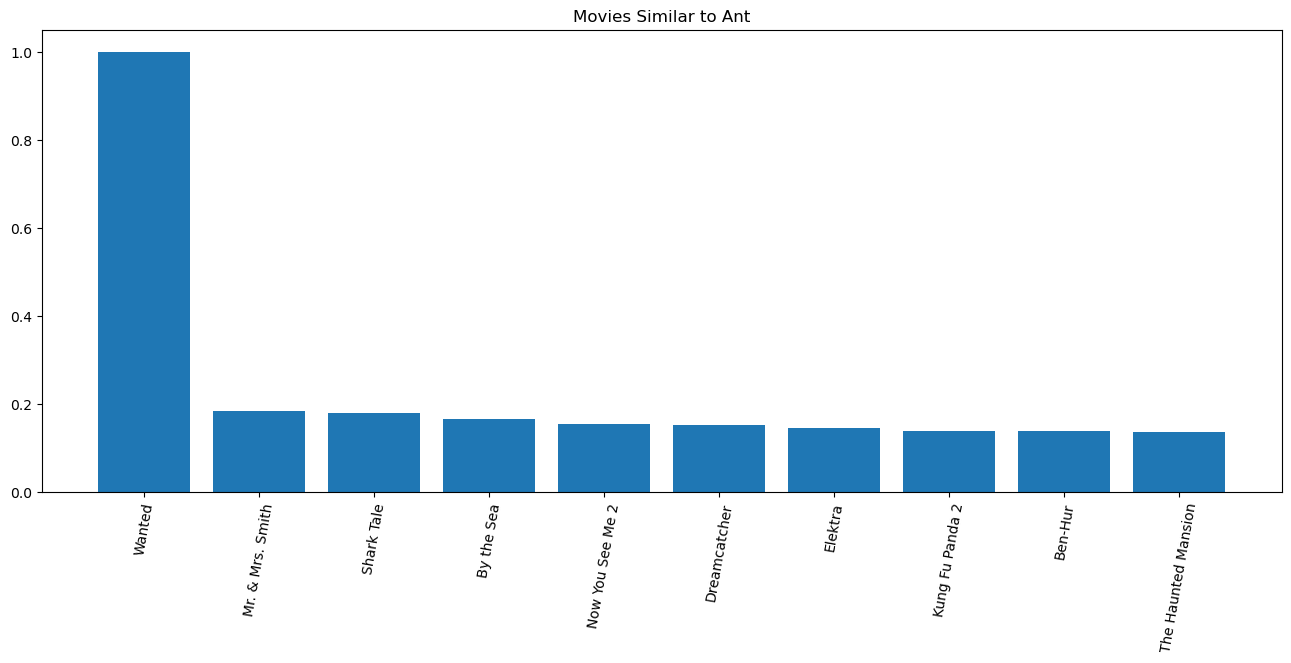

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))

# scatter plot
# plt.scatter(user_movie,sim[0],color='red')
# plt.scatter(t, sim)

# bar plot
# plt.bar(user_movie, sim[0], color='red')
plt.bar(t, sim)

plt.title('Movies Similar to ' + user_movie.title() )
plt.xticks(rotation = 80)
plt.rcParams['font.size'] = 16

plt.show()